<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Heart_Failure_Clinical_Records_Study_used_to_PCA_Ada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📘 Module 20: AdaBoost (Adaptive Boosting) – Practice Notebook

This is a **full practice notebook with detailed guidance and TODO blocks**.


## 0. Notebook Setup

We start by importing all required libraries.  


In [1]:
# TODO: Import all required libraries (Done for you)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1. Understanding the Dataset

You can begin with a **synthetic binary classification dataset**. or with any exisiting dataset.

Focus questions:
- Are the classes easily separable?
- Will a weak learner struggle?


In [2]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
numerical_cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


target_col = "DEATH_EVENT"

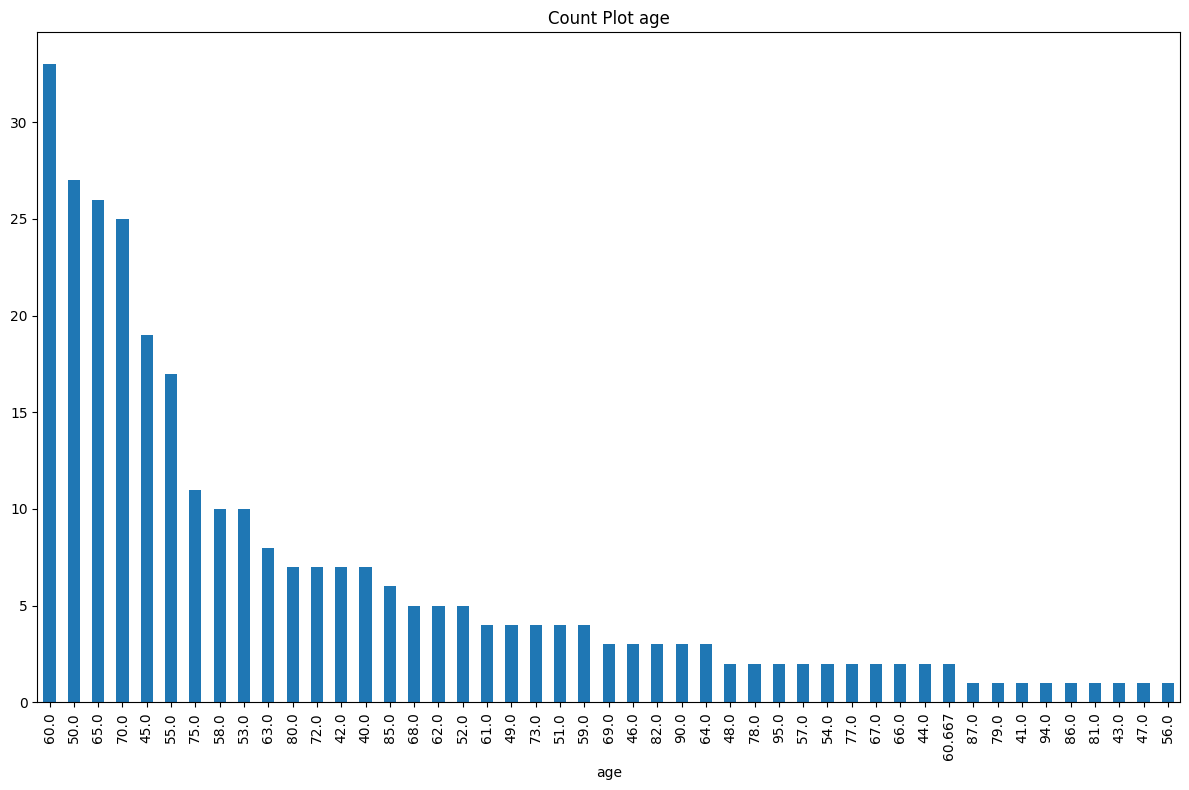

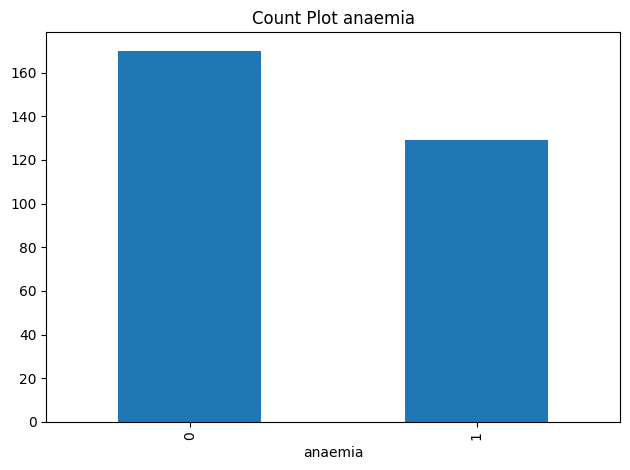

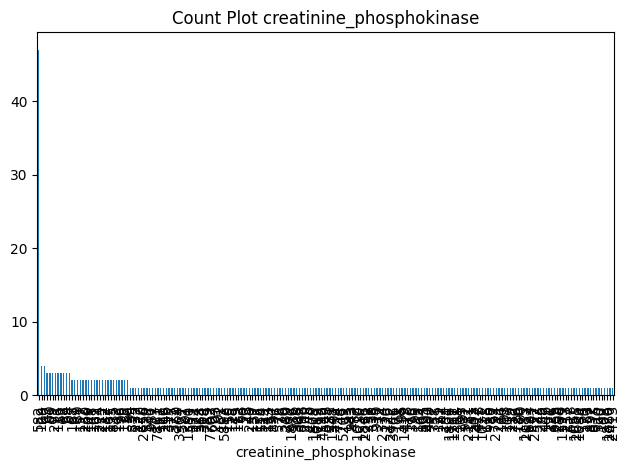

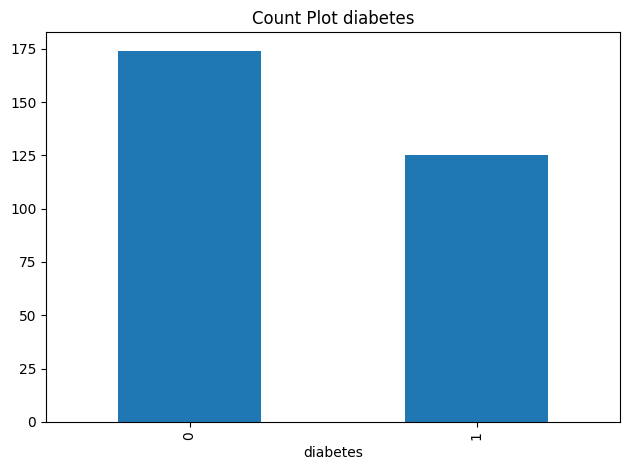

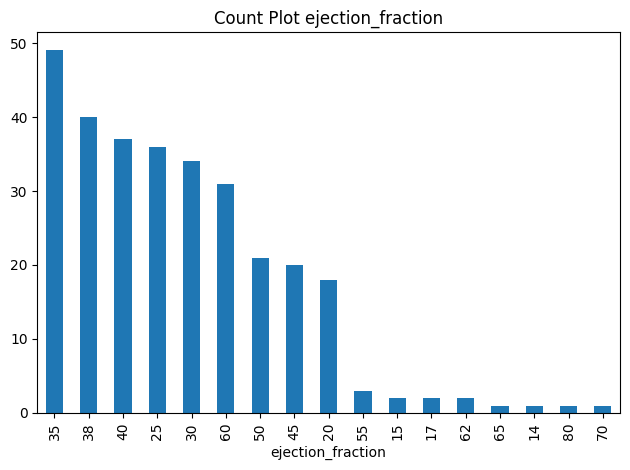

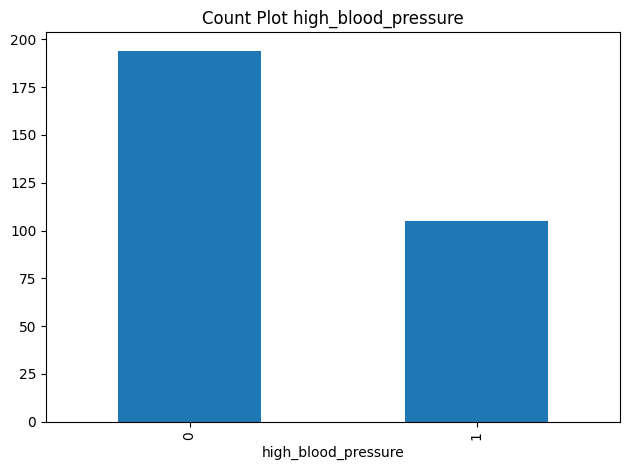

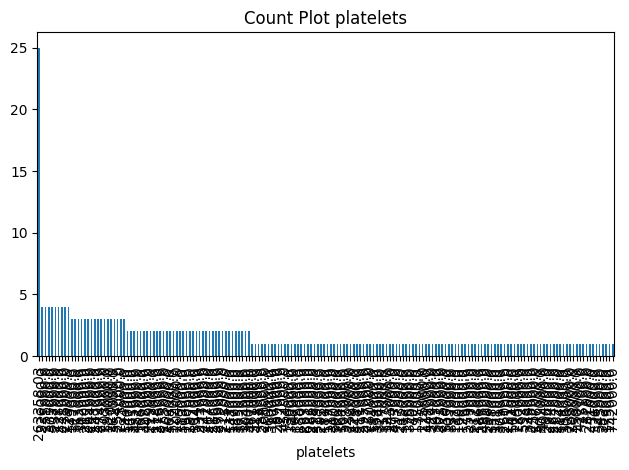

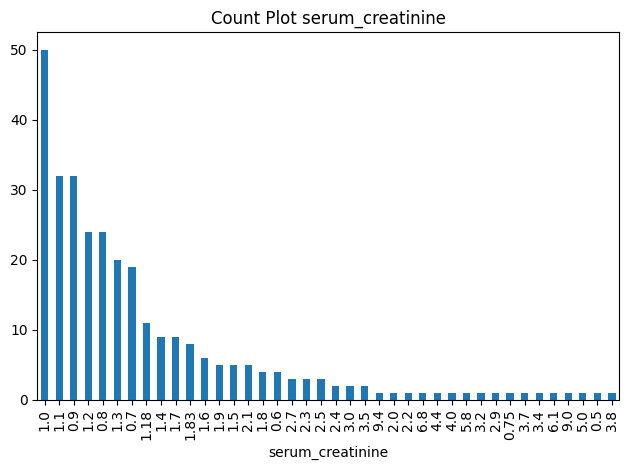

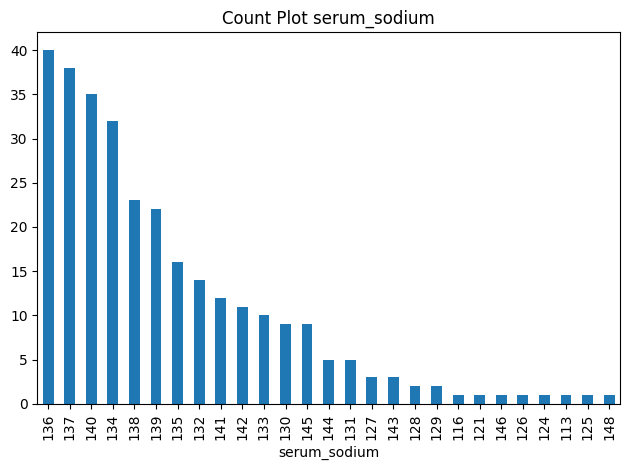

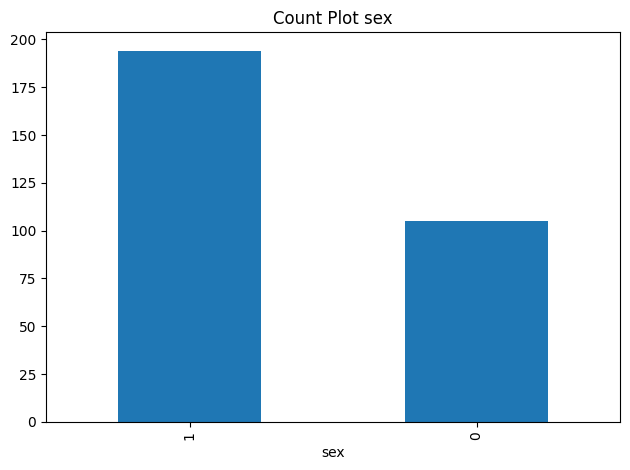

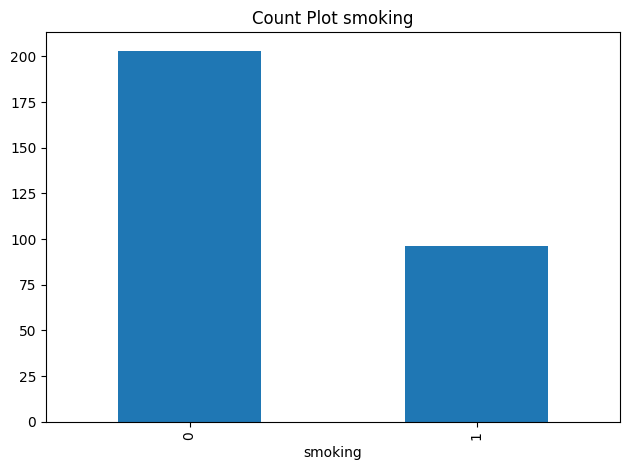

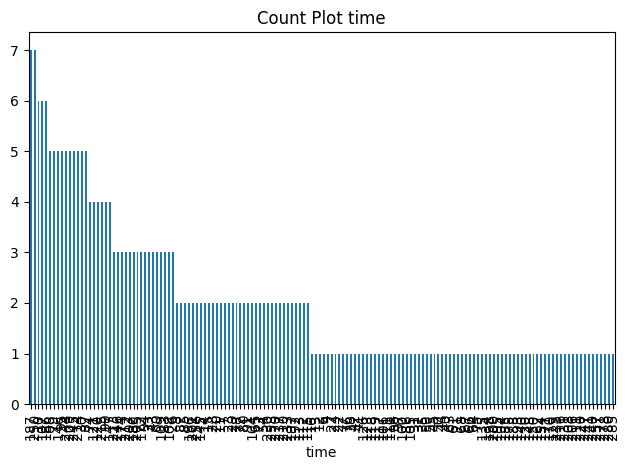

In [7]:
plt.figure(figsize=(12,8))
for c in numerical_cols:
  df[c].value_counts().plot(kind='bar')
  plt.title(f"Count Plot {c}")
  plt.tight_layout()
  plt.show()

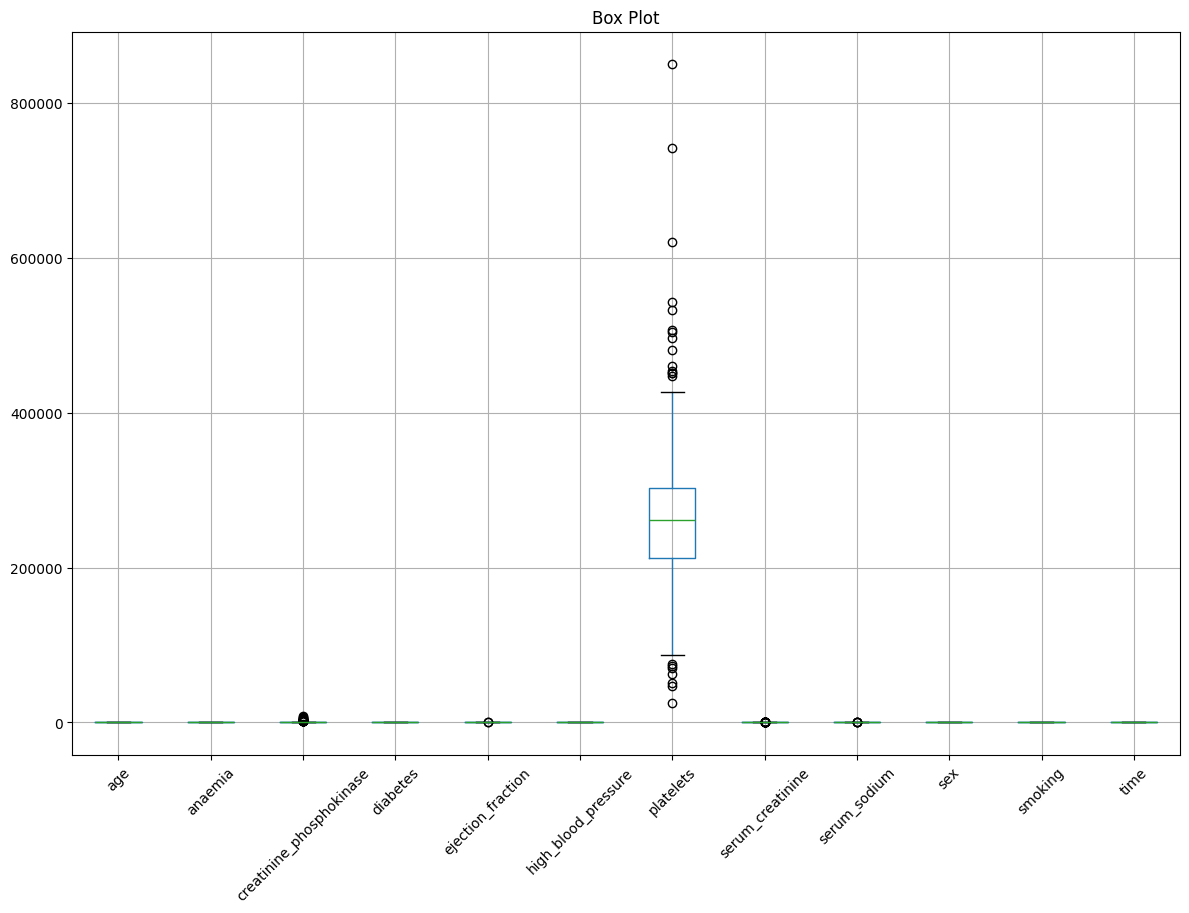

In [8]:
plt.figure(figsize=(12,8))
df[numerical_cols].boxplot()
plt.title("Box Plot")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

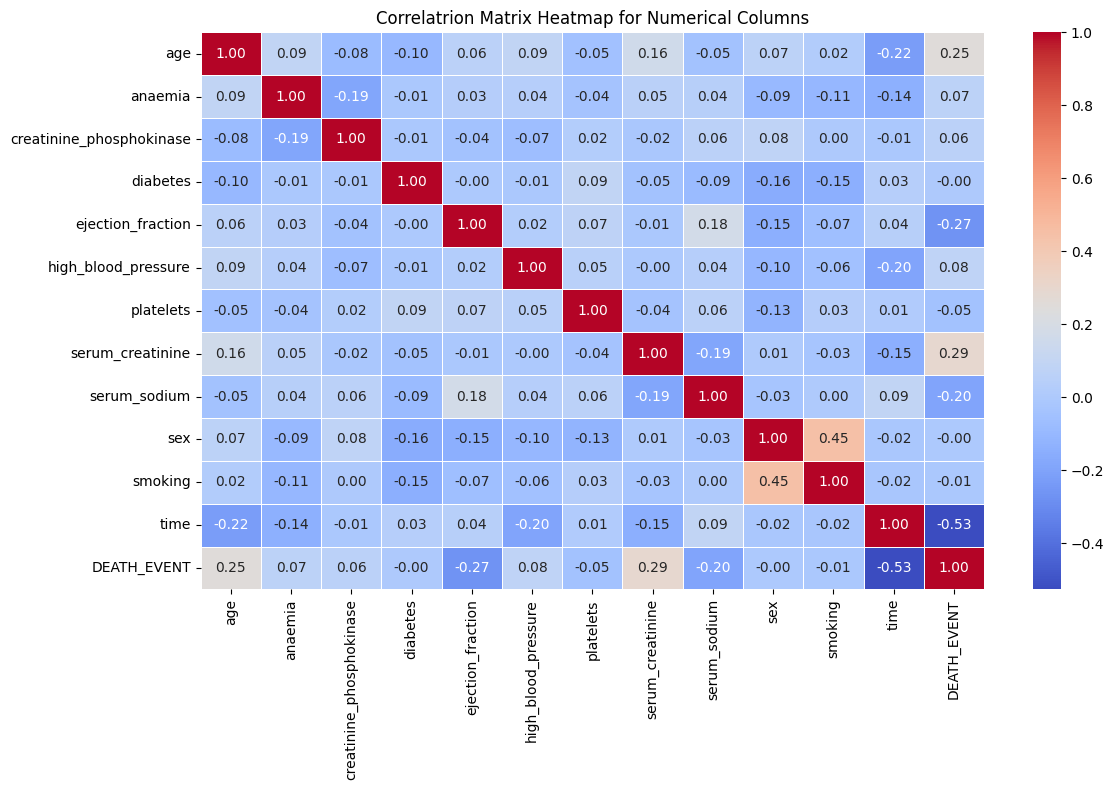

In [9]:
corr_matrix = df[numerical_cols + [target_col]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlatrion Matrix Heatmap for Numerical Columns")
plt.tight_layout()

In [10]:
corr_matrix[target_col].sort_values(ascending=False)

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139


In [11]:
from numpy._core.defchararray import lower
# Outlier Handleing :
Q1 = df['platelets'].quantile(0.25)
print("Q1 :",Q1)
Q3 = df['platelets'].quantile(0.75)
print("Q3 :",Q3)
IQR = Q3 - Q1
print("IQR :",IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound :",lower_bound)
print("Upper Bound :",upper_bound)

outlier = df[(df['platelets'] >= lower_bound) & (df['platelets'] <= upper_bound)]
print(len(outlier))

Q1 : 212500.0
Q3 : 303500.0
IQR : 91000.0
Lower Bound : 76000.0
Upper Bound : 440000.0
278


In [12]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
df_log = df.copy()
df_log['platelets'] = np.log(df_log['platelets'])
df_log.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,12.487485,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,12.481270,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,11.995352,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,12.254863,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,12.697715,2.7,116,0,0,8,1


In [14]:
df_log['age_bin'] = pd.cut(df_log['age'],bins=[0,30,50,70,100],labels=['young','middle_age','old','very_old'])
df_log.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin
0,75.0,0,582,0,20,1,12.487485,1.9,130,1,0,4,1,very_old
1,55.0,0,7861,0,38,0,12.481270,1.1,136,1,0,6,1,old
2,65.0,0,146,0,20,0,11.995352,1.3,129,1,1,7,1,old
3,50.0,1,111,0,20,0,12.254863,1.9,137,1,0,7,1,middle_age
4,65.0,1,160,1,20,0,12.697715,2.7,116,0,0,8,1,old


In [15]:
df_h = pd.get_dummies(df_log,columns=['age_bin'],dtype=int)
df_h.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin_young,age_bin_middle_age,age_bin_old,age_bin_very_old
0,75.0,0,582,0,20,1,12.487485,1.9,130,1,0,4,1,0,0,0,1
1,55.0,0,7861,0,38,0,12.481270,1.1,136,1,0,6,1,0,0,1,0
2,65.0,0,146,0,20,0,11.995352,1.3,129,1,1,7,1,0,0,1,0
3,50.0,1,111,0,20,0,12.254863,1.9,137,1,0,7,1,0,1,0,0
4,65.0,1,160,1,20,0,12.697715,2.7,116,0,0,8,1,0,0,1,0


In [16]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  age_bin_young             299 non-null    int64  
 14  age_bin_mi

In [17]:
df_h.drop(columns=['age'],inplace=True)

In [18]:
df_h.head()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin_young,age_bin_middle_age,age_bin_old,age_bin_very_old
0,0,582,0,20,1,12.487485,1.9,130,1,0,4,1,0,0,0,1
1,0,7861,0,38,0,12.481270,1.1,136,1,0,6,1,0,0,1,0
2,0,146,0,20,0,11.995352,1.3,129,1,1,7,1,0,0,1,0
3,1,111,0,20,0,12.254863,1.9,137,1,0,7,1,0,1,0,0
4,1,160,1,20,0,12.697715,2.7,116,0,0,8,1,0,0,1,0


In [19]:
from sklearn.preprocessing import StandardScaler
X = df_h.drop(columns=[target_col])
y = df_h[target_col]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)


In [21]:
explained

array([1.35058444e-01, 1.23708009e-01, 1.09421110e-01, 8.93478407e-02,
       8.25825757e-02, 7.89777364e-02, 7.00181981e-02, 6.31057568e-02,
       6.18443975e-02, 6.05465382e-02, 4.90920927e-02, 4.06312409e-02,
       3.56660597e-02, 2.34390583e-17, 0.00000000e+00])

In [22]:
cum_explained

array([0.13505844, 0.25876645, 0.36818756, 0.4575354 , 0.54011798,
       0.61909572, 0.68911391, 0.75221967, 0.81406407, 0.87461061,
       0.9237027 , 0.96433394, 1.        , 1.        , 1.        ])

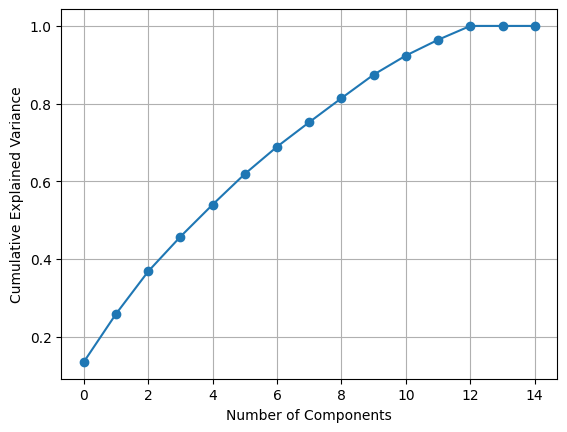

In [23]:
plt.figure()
plt.plot(cum_explained, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

In [24]:
#Selection of k90 and k95
def components_for_threshold(cum_variance,threashold):
  return int(np.argmax(cum_variance>=threashold)+1)

k90 = components_for_threshold(cum_explained, 0.90)
print(k90)

11


In [25]:
k95 = components_for_threshold(cum_explained, 0.95)
print(k95)

12


In [26]:
k99 = components_for_threshold(cum_explained, 0.99)
print(k99)

13


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Pipeline WITHOUT PCA: Scale -> Logistic Regression
pipe_no_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_no_pca.fit(X_train, y_train)
pred_no_pca = pipe_no_pca.predict(X_test)

acc_no_pca = accuracy_score(y_test, pred_no_pca)
acc_no_pca

0.8266666666666667

In [28]:
print("Accuracy (No PCA):", acc_no_pca)
print("\nClassification Report (No PCA):\n")
print(classification_report(y_test, pred_no_pca))

Accuracy (No PCA): 0.8266666666666667

Classification Report (No PCA):

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        51
           1       0.79      0.62      0.70        24

    accuracy                           0.83        75
   macro avg       0.81      0.77      0.79        75
weighted avg       0.82      0.83      0.82        75



In [29]:
pipe_with_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("clf", LogisticRegression(max_iter=500))
])

pipe_with_pca.fit(X_train, y_train)
pred_with_pca = pipe_with_pca.predict(X_test)

acc_with_pca = accuracy_score(y_test, pred_with_pca)
acc_with_pca

0.8266666666666667

In [30]:
# TODO: Generate a binary classification dataset
# Hint:
# - n_samples around 500
# - n_features = 2
# - class_sep > 1


In [31]:
# TODO: Visualize the dataset using a scatter plot
# Color points by class label

# plt.scatter(...)
# plt.show()


## 2. Train–Test Split

Before any model training, we split the data.

Why?
- To evaluate generalization
- To avoid lying to ourselves

Standard split:
- 70% training
- 30% testing


In [32]:
# TODO: Split the dataset into training and testing sets
# Use test_size=0.3 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print('Training samples:', X_train.shape[0])
print('Testing samples:', X_test.shape[0])

Training samples: 209
Testing samples: 90


In [33]:
stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)
y_pred_stump = stump.predict(X_test)
print('Decision Stump Accuracy:', accuracy_score(y_test, y_pred_stump))

Decision Stump Accuracy: 0.7666666666666667



## 3. Baseline Weak Learner (Decision Stump)

Before AdaBoost, we test **one weak learner alone**.

We intentionally restrict the model:
- max_depth = 1
- This is called a **decision stump**

Expectation:
- Accuracy will not be impressive
- That is the point


In [34]:
# TODO: Create a DecisionTreeClassifier with max_depth=1
# SVM, Logistic Regression
# This is our weak learner

In [35]:
# TODO: Train the weak learner
# TODO: Predict on test data
# TODO: Calculate and print accuracy


## 4. AdaBoost Classifier – Core Practice

Now we combine **many weak learners** using AdaBoost.

Key idea:
- Each learner focuses more on previous mistakes
- Misclassified samples get more attention
- Correctly classified samples slowly matter less


In [36]:
# TODO: Initialize AdaBoostClassifier
# Use:
# - base_estimator = decision stump
# - n_estimators = 50
# - learning_rate = 1.0
base_learner = DecisionTreeClassifier(max_depth=1, random_state=42)

ada = AdaBoostClassifier(
    estimator = base_learner,
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('AdaBoost Accuracy: ', accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy:  0.7777777777777778


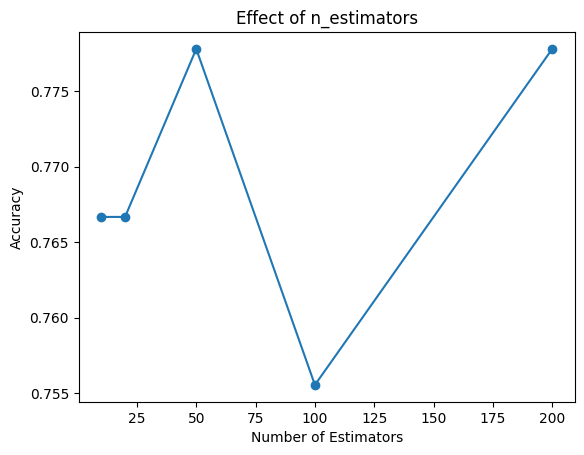

In [37]:
#Effect of Number of Estimators
estimators = [10,20,50,100,200]
accs = []
for n in estimators:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = n,
      learning_rate = 0.3,
      random_state = 42
  )
  model.fit(X_train,y_train)
  accs.append(accuracy_score(y_test,model.predict(X_test)))


plt.plot(estimators, accs, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators')
plt.show()

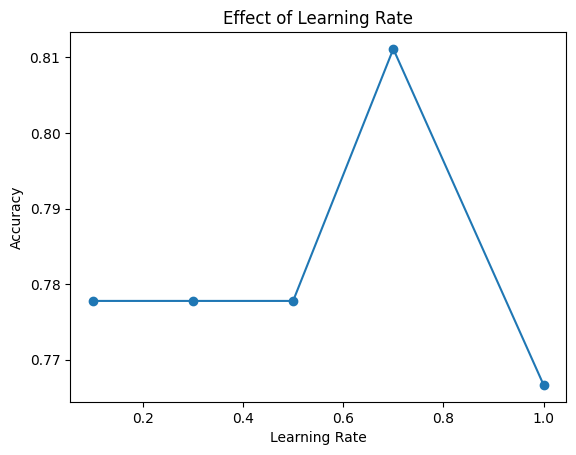

In [38]:
rates = [0.1, 0.3, 0.5, 0.7, 1.0]
accs_lr = []

for lr in rates:
  model = AdaBoostClassifier(
      estimator = base_learner,
      n_estimators = 50,
      learning_rate = lr,
      random_state = 42
  )
  model.fit(X_train,y_train)
  accs_lr.append(accuracy_score(y_test,model.predict(X_test)))


plt.plot(rates, accs_lr, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for AdaBoost
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
    'estimator__max_depth': [1, 2]
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=AdaBoostClassifier(
        estimator=base_learner,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Run grid search
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("Best Parameters Found:")
print(grid.best_params_)
print("\nTest Accuracy (GridSearch AdaBoost):",
      accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters Found:
{'estimator__max_depth': 1, 'learning_rate': 0.7, 'n_estimators': 50}

Test Accuracy (GridSearch AdaBoost): 0.8111111111111111

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        53
           1       0.86      0.65      0.74        37

    accuracy                           0.81        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.81      0.81        90



In [40]:
# TODO: Train AdaBoost on training data
# TODO: Predict on test data
# TODO: Evaluate accuracy
# TODO: Print classification report


## 5. Weak Learner vs AdaBoost Comparison

Now we compare:
- One weak learner
- Many weak learners working together

Expectation:
- AdaBoost should outperform a single stump
- If not, something is wrong


In [41]:
# TODO: Create a comparison table
# Columns:
# - Model
# - Accuracy


## 6. Effect of Number of Estimators

AdaBoost performance depends heavily on:
- Number of estimators

More is not always better.

Your job:
- Experiment
- Observe
- Plot


In [42]:
# TODO: Try different n_estimators values
# Example: [5, 10, 20, 50, 100]

# Store accuracy for each value

In [43]:
# TODO: Plot n_estimators vs accuracy
# Label axes clearly


## 7. Effect of Learning Rate

Learning rate controls **how aggressively** AdaBoost updates sample weights.

Intuition:
- High learning rate → fast but risky
- Low learning rate → slow but stable

You will verify this experimentally.


In [44]:
# TODO: Experiment with different learning_rate values
# Example: [0.01, 0.1, 0.5, 1.0]

In [45]:
# TODO: Plot learning_rate vs accuracy


## 8. Feature Importance in AdaBoost

AdaBoost can tell us:
- Which features were more influential

This depends on:
- How often a feature is used in splits
- How strong the corresponding learners were


In [46]:
# TODO: Extract feature importance from AdaBoost
# TODO: Plot feature importance


## 9. Reflection (Mandatory)

Answer in your own words.

1. Why is AdaBoost called *adaptive*?
2. What happens to misclassified samples after each iteration?
3. Why do we prefer weak learners instead of strong ones?
4. When should AdaBoost not be used?



## 10. Bonus Challenge (Optional)

Replace the decision stump with **Logistic Regression** as the base estimator.

Questions:
- Does AdaBoost still work?
- Should you do this in practice?
- Why or why not?


In [47]:
# TODO: Replace DecisionTreeClassifier with LogisticRegression or SVM
# Train AdaBoost again
# Compare performance